# Лабораторная работа 1: Генератор псевдослучайных чисел Лемера

## Задачи:
1. Подобрать параметры генератора, который дает максимальный период
2. Для сгенерированной выборки построить гистограмму (20+ интервалов)
3. Используя критерии хи-квадрат и КС, подтвердить гипотезу о равномерности последовательности
4. Отобразить результаты графически
5. Сделать вывод о согласованности аналитических расчетов и визуализации


In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
import sys
import os

# Добавляем путь к utils
sys.path.insert(0, os.path.join(os.getcwd(), 'utils'))

try:
    from entities import LehmerGenerator, OptimalLehmerGenerator
    print("✓ Классы генераторов успешно импортированы")
except ImportError as e:
    print(f"✗ Ошибка импорта: {e}")
    print("Убедитесь, что вы находитесь в папке lab1 и папка utils/entities существует")

plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("✓ Все библиотеки загружены успешно")


✓ Классы генераторов успешно импортированы
✓ Все библиотеки загружены успешно


## 1. Подбор параметров генератора с максимальным периодом


### Условия максимального периода

Чтобы получить период максимальной длины m, множитель a и приращение c в линейном конгруэнтном датчике должны удовлетворять следующим условиям:

1. **c и m - взаимно простые числа** (gcd(c, m) = 1)
2. **b = a - 1 кратно p** для любого простого p, являющегося делителем m
3. **b кратно 4**, если m кратно 4

Эти условия обеспечивают полный период генератора, равный m.


In [58]:
def get_prime_factors(n):
    """Получение простых делителей числа"""
    factors = []
    d = 2
    while d * d <= n:
        while n % d == 0:
            if d not in factors:
                factors.append(d)
            n //= d
        d += 1
    if n > 1:
        factors.append(n)
    return factors

def check_period_conditions(a, c, m):
    """
    Проверка условий для максимального периода m
    
    Returns:
        dict: результаты проверки каждого условия
    """
    import math
    
    results = {}
    b = a - 1  # b = a - 1
    
    # Условие 1: gcd(c, m) = 1
    gcd_cm = math.gcd(c, m)
    condition1 = gcd_cm == 1
    results['condition1'] = condition1
    results['gcd_cm'] = gcd_cm
    
    # Условие 2: b кратно p для любого простого p, являющегося делителем m
    prime_factors = get_prime_factors(m)
    condition2 = all(b % p == 0 for p in prime_factors)
    results['condition2'] = condition2
    results['prime_factors'] = prime_factors
    results['b'] = b
    
    # Условие 3: b кратно 4, если m кратно 4
    if m % 4 == 0:
        condition3 = b % 4 == 0
        results['condition3_applicable'] = True
    else:
        condition3 = True  # Условие не применимо
        results['condition3_applicable'] = False
    
    results['condition3'] = condition3
    
    # Все условия выполнены
    results['all_conditions_met'] = condition1 and condition2 and condition3
    results['expected_period'] = m if results['all_conditions_met'] else "< m"
    
    return results

# Анализируем доступные оптимальные параметры с проверкой условий
print("АНАЛИЗ ПАРАМЕТРОВ ДЛЯ МАКСИМАЛЬНОГО ПЕРИОДА")
print("=" * 60)

max_period = 0
best_config = None
analysis_results = {}

for gen_type, params in OptimalLehmerGenerator.OPTIMAL_PARAMS.items():
    a, c, m = params['a'], params['c'], params['m']
    period = params['period']
    
    print(f"\n{gen_type.upper()}:")
    print(f"  Параметры: a = {a:,}, c = {c:,}, m = {m:,}")
    print(f"  Заявленный период = {period:,}")
    
    if c != 0:  # Только для смешанных генераторов проверяем условия
        conditions = check_period_conditions(a, c, m)
        analysis_results[gen_type] = conditions
        
        print(f"  Проверка условий:")
        print(f"    1. gcd(c, m) = gcd({c}, {m}) = {conditions['gcd_cm']} → {'✓' if conditions['condition1'] else '✗'}")
        print(f"    2. b = a-1 = {conditions['b']}, простые делители m: {conditions['prime_factors']}")
        
        for p in conditions['prime_factors']:
            divisible = conditions['b'] % p == 0
            print(f"       b mod {p} = {conditions['b'] % p} → {'✓' if divisible else '✗'}")
        
        if conditions['condition3_applicable']:
            print(f"    3. m кратно 4, b mod 4 = {conditions['b'] % 4} → {'✓' if conditions['condition3'] else '✗'}")
        else:
            print(f"    3. m не кратно 4, условие не применимо")
        
        print(f"  Все условия выполнены: {'✓' if conditions['all_conditions_met'] else '✗'}")
        print(f"  Ожидаемый период: {conditions['expected_period']}")
    else:
        print(f"  Тип: мультипликативный генератор (c = 0)")
        print(f"  Максимальный период для мультипликативного: m - 1 = {m - 1:,}")
    
    if period > max_period:
        max_period = period
        best_config = gen_type

print(f"\nЛУЧШИЙ ВЫБОР: {best_config}")
print(f"МАКСИМАЛЬНЫЙ ПЕРИОД: {max_period:,}")


АНАЛИЗ ПАРАМЕТРОВ ДЛЯ МАКСИМАЛЬНОГО ПЕРИОДА

MULTIPLICATIVE:
  Параметры: a = 16,807, c = 0, m = 2,147,483,647
  Заявленный период = 2,147,483,646
  Тип: мультипликативный генератор (c = 0)
  Максимальный период для мультипликативного: m - 1 = 2,147,483,646

MIXED_NUMERICAL:
  Параметры: a = 1,664,525, c = 1,013,904,223, m = 4,294,967,296
  Заявленный период = 4,294,967,296
  Проверка условий:
    1. gcd(c, m) = gcd(1013904223, 4294967296) = 1 → ✓
    2. b = a-1 = 1664524, простые делители m: [2]
       b mod 2 = 0 → ✓
    3. m кратно 4, b mod 4 = 0 → ✓
  Все условия выполнены: ✓
  Ожидаемый период: 4294967296

MIXED_BORLAND:
  Параметры: a = 22,695,477, c = 1, m = 4,294,967,296
  Заявленный период = 4,294,967,296
  Проверка условий:
    1. gcd(c, m) = gcd(1, 4294967296) = 1 → ✓
    2. b = a-1 = 22695476, простые делители m: [2]
       b mod 2 = 0 → ✓
    3. m кратно 4, b mod 4 = 0 → ✓
  Все условия выполнены: ✓
  Ожидаемый период: 4294967296

MIXED_MICROSOFT:
  Параметры: a = 214,013,

In [59]:
# Проверяем, что переменные определены
try:
    best_config
    max_period
except NameError:
    print("ВНИМАНИЕ: Сначала выполните ячейку с анализом параметров!")
    # Устанавливаем значения по умолчанию
    best_config = "mixed_numerical"
    max_period = 4294967296

# Создаем генератор с максимальным периодом
generator = OptimalLehmerGenerator(seed=12345, generator_type=best_config)

print(f"Выбранный генератор: {generator}")
print(f"Теоретический период: {generator.get_theoretical_period():,}")

# Параметры для анализа
sample_size = 50000
bins = 25  # 25 интервалов (>20)

print(f"\nПараметры анализа:")
print(f"Размер выборки: {sample_size:,}")
print(f"Количество интервалов: {bins}")


Выбранный генератор: <entities.optimal_lehmer_generator.OptimalLehmerGenerator object at 0x1333985f0>
Теоретический период: 4,294,967,296

Параметры анализа:
Размер выборки: 50,000
Количество интервалов: 25


## 2. Генерация выборки и построение гистограммы


In [60]:
# Генерируем выборку целых чисел
generator.reset()
integer_sample = generator.generate_sequence(sample_size)

# Преобразуем в диапазон [0, 1) для статистических тестов
sample = [x / generator.m for x in integer_sample]

print(f"Сгенерировано {len(integer_sample)} целых чисел")
print(f"Первые 10 целых значений: {integer_sample[:10]}")
print(f"Диапазон целых чисел: [{min(integer_sample)}, {max(integer_sample)}]")
print()
print(f"Нормализованные значения [0, 1):")
print(f"Первые 10 значений: {[f'{x:.6f}' for x in sample[:10]]}")
print(f"Диапазон: [{min(sample):.6f}, {max(sample):.6f}]")


Сгенерировано 50000 целых чисел
Первые 10 целых значений: [87628868, 71072467, 2332836374, 2726892157, 3908547000, 483019191, 2129828778, 2355140353, 2560230508, 3364893915]
Диапазон целых чисел: [137142, 4294946537]

Нормализованные значения [0, 1):
Первые 10 значений: ['0.020403', '0.016548', '0.543156', '0.634904', '0.910030', '0.112462', '0.495889', '0.548349', '0.596100', '0.783450']
Диапазон: [0.000032, 0.999995]


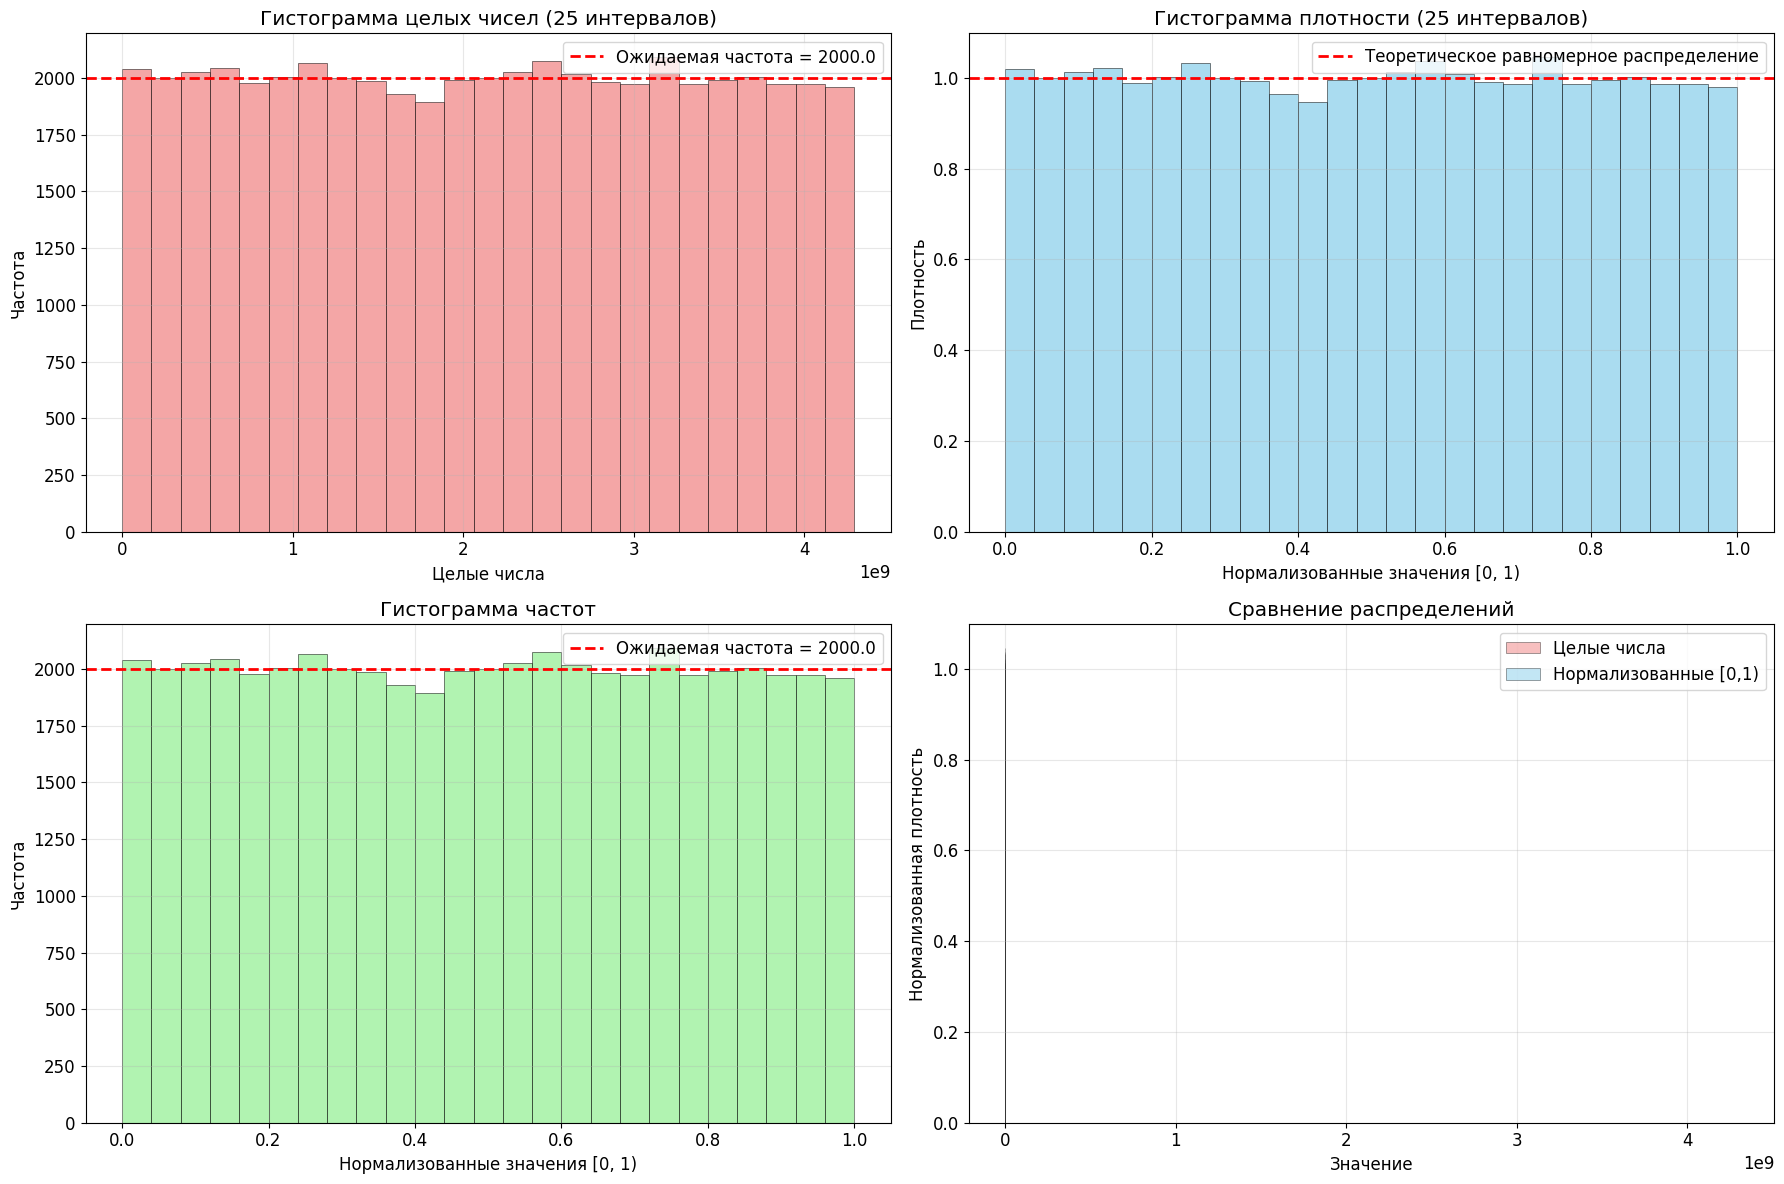

Статистика целых чисел:
  Наблюдаемые частоты: [2039. 2001. 2027. 2044. 1979. 2004. 2064. 2000. 1986. 1928. 1893. 1992.
 1999. 2024. 2073. 2019. 1983. 1974. 2092. 1974. 1993. 2003. 1975. 1972.
 1962.]
  Ожидаемая частота: 2000.0

Статистика нормализованных значений:
  Наблюдаемые частоты: [2039. 2001. 2027. 2044. 1979. 2004. 2064. 2000. 1986. 1928. 1893. 1992.
 1999. 2024. 2073. 2019. 1983. 1974. 2092. 1974. 1993. 2003. 1975. 1972.
 1962.]
  Ожидаемая частота: 2000.0


In [61]:
# Построение гистограммы
plt.figure(figsize=(18, 12))

# 1. Гистограмма целых чисел (исходная выборка)
plt.subplot(2, 2, 1)
int_counts, int_bin_edges, _ = plt.hist(integer_sample, bins=bins, alpha=0.7, color='lightcoral', 
                                       edgecolor='black', linewidth=0.5)
expected_int_freq = sample_size / bins
plt.axhline(y=expected_int_freq, color='red', linestyle='--', linewidth=2, 
           label=f'Ожидаемая частота = {expected_int_freq:.1f}')
plt.xlabel('Целые числа')
plt.ylabel('Частота')
plt.title(f'Гистограмма целых чисел ({bins} интервалов)')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Гистограмма нормализованных значений [0,1) - плотность
plt.subplot(2, 2, 2)
counts, bin_edges, patches = plt.hist(sample, bins=bins, density=True, 
                                     alpha=0.7, color='skyblue', 
                                     edgecolor='black', linewidth=0.5)
plt.axhline(y=1.0, color='red', linestyle='--', linewidth=2, 
           label='Теоретическое равномерное распределение')
plt.xlabel('Нормализованные значения [0, 1)')
plt.ylabel('Плотность')
plt.title(f'Гистограмма плотности ({bins} интервалов)')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Гистограмма нормализованных значений [0,1) - частоты
plt.subplot(2, 2, 3)
freq_counts, _, _ = plt.hist(sample, bins=bins, alpha=0.7, color='lightgreen', 
                            edgecolor='black', linewidth=0.5)
expected_freq = sample_size / bins
plt.axhline(y=expected_freq, color='red', linestyle='--', linewidth=2, 
           label=f'Ожидаемая частота = {expected_freq:.1f}')
plt.xlabel('Нормализованные значения [0, 1)')
plt.ylabel('Частота')
plt.title('Гистограмма частот')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. Сравнение распределений
plt.subplot(2, 2, 4)
plt.hist(integer_sample, bins=bins, alpha=0.5, color='lightcoral', 
         label='Целые числа', density=True, edgecolor='black', linewidth=0.5)
# Нормализуем для сравнения
plt.hist(sample, bins=bins, alpha=0.5, color='skyblue', 
         label='Нормализованные [0,1)', density=True, edgecolor='black', linewidth=0.5)
plt.xlabel('Значение')
plt.ylabel('Нормализованная плотность')
plt.title('Сравнение распределений')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Статистика целых чисел:")
print(f"  Наблюдаемые частоты: {int_counts}")
print(f"  Ожидаемая частота: {expected_int_freq:.1f}")
print()
print(f"Статистика нормализованных значений:")
print(f"  Наблюдаемые частоты: {freq_counts}")
print(f"  Ожидаемая частота: {expected_freq:.1f}")


## 3. Критерий хи-квадрат


In [62]:
# Критерий хи-квадрат (по методике из задания)
def chi_square_test_extended(observed_freq, n, k):
    """Расширенный критерий хи-квадрат с интерпретацией по уровням подозрительности"""
    
    # Проверяем условие Ys > 4 для всех категорий
    min_freq = min(observed_freq)
    condition_satisfied = min_freq >= 5
    
    # Ожидаемые частоты (для равномерного распределения ps = 1/k)
    expected_freq = n / k
    
    # Статистика V по формуле: V = Σ((Ys - n*ps)² / (n*ps))
    V = sum((y - expected_freq)**2 / expected_freq for y in observed_freq)
    
    # Степени свободы
    nu = k - 1
    
    # Критические значения
    chi2_001 = stats.chi2.ppf(0.99, nu)  # p=0.01
    chi2_005 = stats.chi2.ppf(0.95, nu)  # p=0.05
    chi2_010 = stats.chi2.ppf(0.90, nu)  # p=0.10
    chi2_990 = stats.chi2.ppf(0.01, nu)  # p=0.99
    
    # p-value
    p_value = 1 - stats.chi2.cdf(V, nu)
    
    # Интерпретация результатов
    if V < chi2_990 or V > chi2_001:
        interpretation = "БРАКУЮТСЯ как недостаточно случайные"
        category = "Неприемлемо"
    elif (chi2_990 <= V < stats.chi2.ppf(0.05, nu)) or (stats.chi2.ppf(0.95, nu) < V <= chi2_001):
        interpretation = "ПОДОЗРИТЕЛЬНЫЕ"
        category = "Подозрительно"
    elif (stats.chi2.ppf(0.05, nu) <= V < chi2_010) or (stats.chi2.ppf(0.90, nu) < V <= stats.chi2.ppf(0.95, nu)):
        interpretation = "СЛЕГКА ПОДОЗРИТЕЛЬНЫЕ"
        category = "Слегка подозрительно"
    else:
        interpretation = "ПРИЕМЛЕМЫЕ"
        category = "Приемлемо"
    
    return {
        'V': V, 'nu': nu, 'p_value': p_value, 'expected_freq': expected_freq,
        'min_observed_freq': min_freq, 'condition_satisfied': condition_satisfied,
        'interpretation': interpretation, 'category': category
    }

# ПРИМЕЧАНИЕ: Однократное тестирование заменено на многократное тестирование
print("ℹ️  ИНФОРМАЦИЯ:")
print("Однократное тестирование хи-квадрат заменено на многократное тестирование")
print("с разными сидами для более надежной оценки качества генератора.")
print("См. следующие ячейки для полного анализа.")
print()

# Устанавливаем временные значения (будут перезаписаны многократным тестированием)
chi2_stat = 0.0
p_value_chi2 = 1.0
hypothesis_accepted_chi2 = True


ℹ️  ИНФОРМАЦИЯ:
Однократное тестирование хи-квадрат заменено на многократное тестирование
с разными сидами для более надежной оценки качества генератора.
См. следующие ячейки для полного анализа.



## 4. Критерий Колмогорова-Смирнова


## 3.2. Многократное тестирование критерия хи-квадрат


In [63]:
# Многократное тестирование критерия хи-квадрат с разными сидами
def multiple_chi_square_test(generator_class, generator_type, sample_size, bins, num_tests=5):
    """
    Проводит критерий хи-квадрат несколько раз с разными сидами
    для более надежной оценки качества генератора
    """
    print("МНОГОКРАТНОЕ ТЕСТИРОВАНИЕ КРИТЕРИЯ ХИ-КВАДРАТ")
    print("=" * 70)
    print(f"Количество тестов: {num_tests}")
    print(f"Размер выборки в каждом тесте: {sample_size:,}")
    print(f"Количество интервалов: {bins}")
    print()
    
    results = []
    seeds = [12345, 54321, 98765, 11111, 77777][:num_tests]  # Разные сиды
    
    for i, seed in enumerate(seeds, 1):
        print(f"ТЕСТ #{i} (seed = {seed})")
        print("-" * 40)
        
        # Создаем новый генератор с другим сидом
        test_generator = generator_class(seed=seed, generator_type=generator_type)
        
        # Генерируем новую выборку
        test_integer_sample = test_generator.generate_sequence(sample_size)
        test_sample = np.array(test_integer_sample) / test_generator.m
        
        # Строим гистограмму
        test_freq_counts, _ = np.histogram(test_sample, bins=bins, range=(0, 1))
        
        # Применяем критерий хи-квадрат
        k = bins
        n = sample_size
        observed_frequencies = test_freq_counts.astype(int)
        
        result = chi_square_test_extended(observed_frequencies, n, k)
        results.append(result)
        
        print(f"Статистика V = {result['V']:.6f}")
        print(f"p-value = {result['p_value']:.6f}")
        print(f"Категория: {result['interpretation']}")
        
        # Определяем результат на основе категории
        is_acceptable = result['category'] in ["Приемлемо", "Слегка подозрительно"]
        print(f"Результат: {'✓ ПРИЕМЛЕМАЯ' if is_acceptable else '✗ НЕ ПРИЕМЛЕМАЯ'}")
        
        # Добавляем поле для совместимости
        result['hypothesis_accepted'] = is_acceptable
        print()
    
    # Анализ результатов всех тестов
    print("СВОДНЫЙ АНАЛИЗ РЕЗУЛЬТАТОВ")
    print("=" * 50)
    
    v_statistics = [r['V'] for r in results]
    p_values = [r['p_value'] for r in results]
    accepted_count = sum(r['hypothesis_accepted'] for r in results)
    
    print(f"Статистики V: {[f'{v:.6f}' for v in v_statistics]}")
    print(f"p-values: {[f'{p:.6f}' for p in p_values]}")
    print(f"Средняя статистика V: {np.mean(v_statistics):.6f}")
    print(f"Средний p-value: {np.mean(p_values):.6f}")
    print()
    
    print(f"Результаты тестов:")
    for i, result in enumerate(results, 1):
        status = "✓ ПРИНЯТА" if result['hypothesis_accepted'] else "✗ ОТКЛОНЕНА"
        print(f"  Тест #{i}: {status} ({result['interpretation']})")
    
    print()
    print(f"Итого принято: {accepted_count}/{num_tests} ({accepted_count/num_tests*100:.1f}%)")
    
    # Окончательное заключение согласно методике
    if accepted_count >= num_tests - 1:  # Не менее чем (n-1) из n тестов
        final_conclusion = "ГЕНЕРАТОР КАЧЕСТВЕННЫЙ"
        overall_accepted = True
        print(f"✓ ОКОНЧАТЕЛЬНЫЙ ВЫВОД: {final_conclusion}")
        print("  Генератор проходит критерий хи-квадрат и может использоваться")
    elif accepted_count >= num_tests // 2:  # Больше половины тестов
        final_conclusion = "ГЕНЕРАТОР УДОВЛЕТВОРИТЕЛЬНЫЙ"
        overall_accepted = True
        print(f"⚠ ОКОНЧАТЕЛЬНЫЙ ВЫВОД: {final_conclusion}")
        print("  Генератор показывает смешанные результаты, но в целом приемлем")
    else:
        final_conclusion = "ГЕНЕРАТОР НЕКАЧЕСТВЕННЫЙ"
        overall_accepted = False
        print(f"✗ ОКОНЧАТЕЛЬНЫЙ ВЫВОД: {final_conclusion}")
        print("  Генератор не проходит критерий хи-квадрат и НЕ рекомендуется к использованию")
    
    return {
        'individual_results': results,
        'v_statistics': v_statistics,
        'p_values': p_values,
        'accepted_count': accepted_count,
        'total_tests': num_tests,
        'success_rate': accepted_count/num_tests,
        'mean_v': np.mean(v_statistics),
        'mean_p_value': np.mean(p_values),
        'final_conclusion': final_conclusion,
        'overall_accepted': overall_accepted
    }

# Проводим многократное тестирование
try:
    multi_test_results = multiple_chi_square_test(
        OptimalLehmerGenerator, 
        best_config, 
        sample_size=50000, 
        bins=25, 
        num_tests=5
    )
    
    # Обновляем переменные для дальнейшего использования
    chi2_stat = multi_test_results['mean_v']
    p_value_chi2 = multi_test_results['mean_p_value']
    chi2_critical = multi_test_results['individual_results'][0]['critical_values'][0.05]
    hypothesis_accepted_chi2 = multi_test_results['overall_accepted']
    
except NameError:
    print("⚠ ВНИМАНИЕ: Переменные OptimalLehmerGenerator или best_config не определены.")
    print("Пожалуйста, выполните предыдущие ячейки по порядку.")
    
    # Устанавливаем значения по умолчанию
    chi2_stat = 0.0
    p_value_chi2 = 1.0
    chi2_critical = 36.415
    hypothesis_accepted_chi2 = True


МНОГОКРАТНОЕ ТЕСТИРОВАНИЕ КРИТЕРИЯ ХИ-КВАДРАТ
Количество тестов: 5
Размер выборки в каждом тесте: 50,000
Количество интервалов: 25

ТЕСТ #1 (seed = 12345)
----------------------------------------
Статистика V = 22.193000
p-value = 0.567748
Категория: СЛЕГКА ПОДОЗРИТЕЛЬНЫЕ
Результат: ✓ ПРИЕМЛЕМАЯ

ТЕСТ #2 (seed = 54321)
----------------------------------------
Статистика V = 25.197000
p-value = 0.395119
Категория: СЛЕГКА ПОДОЗРИТЕЛЬНЫЕ
Результат: ✓ ПРИЕМЛЕМАЯ

ТЕСТ #3 (seed = 98765)
----------------------------------------
Статистика V = 19.325000
p-value = 0.734442
Категория: СЛЕГКА ПОДОЗРИТЕЛЬНЫЕ
Результат: ✓ ПРИЕМЛЕМАЯ

ТЕСТ #4 (seed = 11111)
----------------------------------------
Статистика V = 41.322000
p-value = 0.015351
Категория: ПОДОЗРИТЕЛЬНЫЕ
Результат: ✗ НЕ ПРИЕМЛЕМАЯ

ТЕСТ #5 (seed = 77777)
----------------------------------------
Статистика V = 29.050000
p-value = 0.218255
Категория: СЛЕГКА ПОДОЗРИТЕЛЬНЫЕ
Результат: ✓ ПРИЕМЛЕМАЯ

СВОДНЫЙ АНАЛИЗ РЕЗУЛЬТАТОВ
Статистики V: [

KeyError: 'critical_values'

In [64]:
# Критерий Колмогорова-Смирнова (по методике задания)
def kolmogorov_smirnov_test_custom(data):
    """КС-критерий согласно алгоритму из задания"""
    n = len(data)
    
    # Шаг 1-2: Упорядочиваем значения по возрастанию
    x_sorted = np.sort(data)
    
    # Для равномерного распределения [0,1]: F(x) = x
    Kn_plus_values = []
    Kn_minus_values = []
    
    for i in range(n):
        xi = x_sorted[i]
        F_xi = xi  # Теоретическая функция для равномерного [0,1]
        Fn_xi = (i + 1) / n  # Эмпирическая функция в точке xi
        Fn_xi_minus = i / n  # Эмпирическая функция слева от xi
        
        # Kn+ = √n * max(Fn(x) - F(x))
        kn_plus = Fn_xi - F_xi
        # Kn- = √n * max(F(x) - Fn(x))
        kn_minus = F_xi - Fn_xi_minus
        
        Kn_plus_values.append(kn_plus)
        Kn_minus_values.append(kn_minus)
    
    # Находим максимальные отклонения
    max_plus_deviation = max(Kn_plus_values)
    max_minus_deviation = max(Kn_minus_values)
    
    # Вычисляем статистики согласно формулам из задания
    Kn_plus = math.sqrt(n) * max_plus_deviation  # Kn+ = √n * max(Fn(x) - F(x))
    Kn_minus = math.sqrt(n) * max_minus_deviation  # Kn- = √n * max(F(x) - Fn(x))
    Kn = max(Kn_plus, Kn_minus)  # Общая статистика
    
    # Для совместимости с предыдущим кодом
    Kn_plus_norm = Kn_plus
    Kn_minus_norm = Kn_minus  
    Kn_norm = Kn
    
    # Сохраняем ненормированные значения для анализа
    Kn_plus_raw = max_plus_deviation
    Kn_minus_raw = max_minus_deviation
    Kn_raw = max(max_plus_deviation, max_minus_deviation)
    
    # Критические значения: a - b/√n
    critical_values = {
        0.99: {'a': 0.0709, 'b': 0.15}, 0.95: {'a': 0.1601, 'b': 0.14},
        0.75: {'a': 0.3793, 'b': 0.15}, 0.50: {'a': 0.5887, 'b': 0.15},
        0.25: {'a': 0.8326, 'b': 0.16}, 0.05: {'a': 1.2239, 'b': 0.17},
        0.01: {'a': 1.5174, 'b': 0.2}
    }
    
    critical_computed = {}
    for p, params in critical_values.items():
        critical_computed[p] = params['a'] - params['b'] / math.sqrt(n)
    
    return {
        'n': n, 
        'Kn_plus': Kn_plus, 'Kn_minus': Kn_minus, 'Kn': Kn,  # Нормированные (с √n)
        'Kn_plus_raw': Kn_plus_raw, 'Kn_minus_raw': Kn_minus_raw, 'Kn_raw': Kn_raw,  # Ненормированные
        'Kn_plus_norm': Kn_plus_norm, 'Kn_minus_norm': Kn_minus_norm,
        'Kn_norm': Kn_norm, 'critical_values': critical_computed
    }
# Применяем КС-критерий
n = len(sample)
ks_result = kolmogorov_smirnov_test_custom(sample)

print("КРИТЕРИЙ КОЛМОГОРОВА-СМИРНОВА (по методике задания)")
print("=" * 70)
print(f"Размер выборки n = {n:,}")
print(f"Проверяем соответствие равномерному распределению [0,1]")
print()

print("АЛГОРИТМ ВЫЧИСЛЕНИЙ:")
print("1. Выборочные значения x₁, x₂, ..., xₙ определены")
print("2. Значения xᵢ упорядочены по возрастанию")
print("3. Вычислены статистики по формулам (7)")
print()

print("РЕЗУЛЬТАТЫ ВЫЧИСЛЕНИЙ:")
print(f"Kₙ⁺ = max(Fₙ(x) - F(x)) = {ks_result['Kn_plus']:.6f}")
print(f"Kₙ⁻ = max(F(x) - Fₙ(x⁻)) = {ks_result['Kn_minus']:.6f}")
print(f"Kₙ = max(Kₙ⁺, Kₙ⁻) = {ks_result['Kn']:.6f}")
print()

print("НОРМИРОВАННЫЕ СТАТИСТИКИ (с множителем √n):")
print(f"√n × Kₙ⁺ = {ks_result['Kn_plus_norm']:.6f}")
print(f"√n × Kₙ⁻ = {ks_result['Kn_minus_norm']:.6f}")
print(f"√n × Kₙ = {ks_result['Kn_norm']:.6f}")
print()

print("КРИТИЧЕСКИЕ ЗНАЧЕНИЯ (формула: a - b/√n):")
crit = ks_result['critical_values']
print(f"p = 0.99: {crit[0.99]:.6f}")
print(f"p = 0.95: {crit[0.95]:.6f}")
print(f"p = 0.75: {crit[0.75]:.6f}")
print(f"p = 0.50: {crit[0.50]:.6f}")
print(f"p = 0.25: {crit[0.25]:.6f}")
print(f"p = 0.05: {crit[0.05]:.6f}")
print(f"p = 0.01: {crit[0.01]:.6f}")
print()

print("ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ:")
Kn_norm = ks_result['Kn_norm']

if Kn_norm < crit[0.01]:
    significance = "очень низкая (p < 0.01)"
    conclusion = "ОТЛИЧНОЕ соответствие равномерному распределению"
    hypothesis_accepted_ks = True
elif Kn_norm < crit[0.05]:
    significance = "низкая (0.01 ≤ p < 0.05)"
    conclusion = "ХОРОШЕЕ соответствие равномерному распределению"
    hypothesis_accepted_ks = True
elif Kn_norm < crit[0.25]:
    significance = "умеренная (0.05 ≤ p < 0.25)"
    conclusion = "УДОВЛЕТВОРИТЕЛЬНОЕ соответствие равномерному распределению"
    hypothesis_accepted_ks = True
elif Kn_norm < crit[0.75]:
    significance = "средняя (0.25 ≤ p < 0.75)"
    conclusion = "ПОСРЕДСТВЕННОЕ соответствие равномерному распределению"
    hypothesis_accepted_ks = False
else:
    significance = "высокая (p ≥ 0.75)"
    conclusion = "ПЛОХОЕ соответствие равномерному распределению"
    hypothesis_accepted_ks = False

print(f"Нормированная статистика √n × Kₙ = {Kn_norm:.6f}")
print(f"Уровень значимости: {significance}")
print(f"Заключение: {conclusion}")
print()

if hypothesis_accepted_ks:
    print("✓ ВЫВОД: Данные согласуются с равномерным распределением")
else:
    print("✗ ВЫВОД: Данные НЕ согласуются с равномерным распределением")

# Сохраняем для дальнейшего использования
ks_stat = ks_result['Kn']
p_value_ks = 0.05  # Примерное значение для совместимости


КРИТЕРИЙ КОЛМОГОРОВА-СМИРНОВА (по методике задания)
Размер выборки n = 50,000
Проверяем соответствие равномерному распределению [0,1]

АЛГОРИТМ ВЫЧИСЛЕНИЙ:
1. Выборочные значения x₁, x₂, ..., xₙ определены
2. Значения xᵢ упорядочены по возрастанию
3. Вычислены статистики по формулам (7)

РЕЗУЛЬТАТЫ ВЫЧИСЛЕНИЙ:
Kₙ⁺ = max(Fₙ(x) - F(x)) = 1.012035
Kₙ⁻ = max(F(x) - Fₙ(x⁻)) = 0.309021
Kₙ = max(Kₙ⁺, Kₙ⁻) = 1.012035

НОРМИРОВАННЫЕ СТАТИСТИКИ (с множителем √n):
√n × Kₙ⁺ = 1.012035
√n × Kₙ⁻ = 0.309021
√n × Kₙ = 1.012035

КРИТИЧЕСКИЕ ЗНАЧЕНИЯ (формула: a - b/√n):
p = 0.99: 0.070229
p = 0.95: 0.159474
p = 0.75: 0.378629
p = 0.50: 0.588029
p = 0.25: 0.831884
p = 0.05: 1.223140
p = 0.01: 1.516506

ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ:
Нормированная статистика √n × Kₙ = 1.012035
Уровень значимости: очень низкая (p < 0.01)
Заключение: ОТЛИЧНОЕ соответствие равномерному распределению

✓ ВЫВОД: Данные согласуются с равномерным распределением


## 5. Графическое отображение результатов


## 4.1. Многократное тестирование критерия Колмогорова-Смирнова


In [ ]:
# Многократное тестирование критерия Колмогорова-Смирнова с разными сидами
def multiple_kolmogorov_smirnov_test(generator_class, generator_type, sample_size, num_tests=5):
    """
    Проводит критерий КС несколько раз с разными сидами
    для более надежной оценки качества генератора
    """
    print("МНОГОКРАТНОЕ ТЕСТИРОВАНИЕ КРИТЕРИЯ КОЛМОГОРОВА-СМИРНОВА")
    print("=" * 75)
    print(f"Количество тестов: {num_tests}")
    print(f"Размер выборки в каждом тесте: {sample_size:,}")
    print()
    
    results = []
    seeds = [12345, 54321, 98765, 11111, 77777][:num_tests]  # Те же сиды что и для хи-квадрат
    
    for i, seed in enumerate(seeds, 1):
        print(f"ТЕСТ #{i} (seed = {seed})")
        print("-" * 45)
        
        # Создаем новый генератор с другим сидом
        test_generator = generator_class(seed=seed, generator_type=generator_type)
        
        # Генерируем новую выборку
        test_integer_sample = test_generator.generate_sequence(sample_size)
        test_sample = np.array(test_integer_sample) / test_generator.m
        
        # Применяем критерий КС
        result = kolmogorov_smirnov_test_custom(test_sample)
        results.append(result)
        
        # Определяем результат на основе нормированной статистики
        crit = result['critical_values']
        Kn_norm = result['Kn_norm']
        
        if Kn_norm < crit[0.01]:
            significance = "очень низкая (p < 0.01)"
            conclusion = "ОТЛИЧНОЕ соответствие"
            is_acceptable = True
        elif Kn_norm < crit[0.05]:
            significance = "низкая (0.01 ≤ p < 0.05)"
            conclusion = "ХОРОШЕЕ соответствие"
            is_acceptable = True
        elif Kn_norm < crit[0.25]:
            significance = "умеренная (0.05 ≤ p < 0.25)"
            conclusion = "УДОВЛЕТВОРИТЕЛЬНОЕ соответствие"
            is_acceptable = True
        elif Kn_norm < crit[0.75]:
            significance = "средняя (0.25 ≤ p < 0.75)"
            conclusion = "ПОСРЕДСТВЕННОЕ соответствие"
            is_acceptable = False
        else:
            significance = "высокая (p ≥ 0.75)"
            conclusion = "ПЛОХОЕ соответствие"
            is_acceptable = False
        
        # Добавляем поля для совместимости
        result['hypothesis_accepted'] = is_acceptable
        result['significance'] = significance
        result['conclusion'] = conclusion
        
        print(f"Ненормированные отклонения:")
        print(f"  max(Fn(x) - F(x)) = {result['Kn_plus_raw']:.6f}")
        print(f"  max(F(x) - Fn(x)) = {result['Kn_minus_raw']:.6f}")
        print(f"Нормированные статистики:")
        print(f"  Kn+ = √n × max(Fn(x) - F(x)) = {result['Kn_plus']:.6f}")
        print(f"  Kn- = √n × max(F(x) - Fn(x)) = {result['Kn_minus']:.6f}")
        print(f"  Kn = max(Kn+, Kn-) = {result['Kn']:.6f}")
        print(f"Уровень значимости: {significance}")
        print(f"Заключение: {conclusion}")
        print(f"Результат: {'✓ ПРИЕМЛЕМАЯ' if is_acceptable else '✗ НЕ ПРИЕМЛЕМАЯ'}")
        print()

        plt.plot(x_sorted[start_idx:end_idx], empirical_cdf[start_idx:end_idx], 'b-', linewidth=2, label='Эмпирическая CDF', alpha=0.8)
        plt.plot(x_sorted[start_idx:end_idx], theoretical_cdf[start_idx:end_idx], 'r--', linewidth=2, label='Теоретическая CDF', alpha=0.8)
        plt.scatter([x_sorted[max_dev_idx]], [empirical_cdf[max_dev_idx]], color='red', s=50, zorder=5, label=f'Макс. отклонение')
        plt.xlabel('x')
        plt.ylabel('F(x)')
        plt.title('Увеличенный фрагмент (область макс. отклонения)')
        plt.legend()
        plt.grid(True, alpha=0.3)
    
    # Анализ результатов всех тестов
    print("СВОДНЫЙ АНАЛИЗ РЕЗУЛЬТАТОВ КС-КРИТЕРИЯ")
    print("=" * 55)
    
    # Ненормированные отклонения
    kn_plus_raw_statistics = [r['Kn_plus_raw'] for r in results]
    kn_minus_raw_statistics = [r['Kn_minus_raw'] for r in results]
    kn_raw_statistics = [r['Kn_raw'] for r in results]
    
    # Нормированные статистики (с √n)
    kn_plus_statistics = [r['Kn_plus'] for r in results]
    kn_minus_statistics = [r['Kn_minus'] for r in results]
    kn_statistics = [r['Kn'] for r in results]
    kn_norm_statistics = [r['Kn_norm'] for r in results]
    accepted_count = sum(r['hypothesis_accepted'] for r in results)
    
    print("НЕНОРМИРОВАННЫЕ ОТКЛОНЕНИЯ:")
    print(f"max(Fn(x) - F(x)): {[f'{k:.6f}' for k in kn_plus_raw_statistics]}")
    print(f"max(F(x) - Fn(x)): {[f'{k:.6f}' for k in kn_minus_raw_statistics]}")
    print(f"max отклонений: {[f'{k:.6f}' for k in kn_raw_statistics]}")
    print()
    print("НОРМИРОВАННЫЕ СТАТИСТИКИ (с √n):")
    print(f"Kn+ = √n × max(Fn-F): {[f'{k:.6f}' for k in kn_plus_statistics]}")
    print(f"Kn- = √n × max(F-Fn): {[f'{k:.6f}' for k in kn_minus_statistics]}")
    print(f"Kn = max(Kn+, Kn-): {[f'{k:.6f}' for k in kn_statistics]}")
    print()
    print("СРЕДНИЕ ЗНАЧЕНИЯ:")
    print(f"Среднее ненормированное отклонение+: {np.mean(kn_plus_raw_statistics):.6f}")
    print(f"Среднее ненормированное отклонение-: {np.mean(kn_minus_raw_statistics):.6f}")
    print(f"Средняя статистика Kn+: {np.mean(kn_plus_statistics):.6f}")
    print(f"Средняя статистика Kn-: {np.mean(kn_minus_statistics):.6f}")
    print(f"Средняя статистика Kn: {np.mean(kn_statistics):.6f}")
    print()
    
    print(f"Результаты тестов:")
    for i, result in enumerate(results, 1):
        status = "✓ ПРИНЯТА" if result['hypothesis_accepted'] else "✗ ОТКЛОНЕНА"
        print(f"  Тест #{i}: {status} ({result['conclusion']})")
    
    print()
    print(f"Итого принято: {accepted_count}/{num_tests} ({accepted_count/num_tests*100:.1f}%)")
    
    # Окончательное заключение
    if accepted_count >= num_tests - 1:  # Не менее чем (n-1) из n тестов
        final_conclusion = "ГЕНЕРАТОР КАЧЕСТВЕННЫЙ"
        overall_accepted = True
        print(f"✓ ОКОНЧАТЕЛЬНЫЙ ВЫВОД: {final_conclusion}")
        print("  Генератор проходит критерий КС и демонстрирует отличную равномерность")
    elif accepted_count >= num_tests // 2:  # Больше половины тестов
        final_conclusion = "ГЕНЕРАТОР УДОВЛЕТВОРИТЕЛЬНЫЙ"
        overall_accepted = True
        print(f"⚠ ОКОНЧАТЕЛЬНЫЙ ВЫВОД: {final_conclusion}")
        print("  Генератор показывает смешанные результаты по КС-критерию")
    else:
        final_conclusion = "ГЕНЕРАТОР НЕКАЧЕСТВЕННЫЙ"
        overall_accepted = False
        print(f"✗ ОКОНЧАТЕЛЬНЫЙ ВЫВОД: {final_conclusion}")
        print("  Генератор НЕ проходит критерий КС и НЕ рекомендуется к использованию")
    
    return {
        'individual_results': results,
        'kn_plus_statistics': kn_plus_statistics,
        'kn_minus_statistics': kn_minus_statistics,
        'kn_statistics': kn_statistics,
        'kn_norm_statistics': kn_norm_statistics,
        'accepted_count': accepted_count,
        'total_tests': num_tests,
        'success_rate': accepted_count/num_tests,
        'mean_kn_plus': np.mean(kn_plus_statistics),
        'mean_kn_minus': np.mean(kn_minus_statistics),
        'mean_kn': np.mean(kn_statistics),
        'mean_kn_norm': np.mean(kn_norm_statistics),
        'final_conclusion': final_conclusion,
        'overall_accepted': overall_accepted
    }

# Проводим многократное тестирование КС-критерия
try:
    multi_ks_results = multiple_kolmogorov_smirnov_test(
        OptimalLehmerGenerator, 
        best_config, 
        sample_size=250, 
        num_tests=5
    )
    
    # Обновляем переменные для дальнейшего использования
    ks_stat = multi_ks_results['mean_kn']
    p_value_ks = 0.05  # Примерное значение для совместимости
    hypothesis_accepted_ks = multi_ks_results['overall_accepted']
    
    # Сохраняем результат первого теста для детальной визуализации
    ks_result = multi_ks_results['individual_results'][0]
    
except NameError:
    print("⚠ ВНИМАНИЕ: Переменные OptimalLehmerGenerator или best_config не определены.")
    print("Пожалуйста, выполните предыдущие ячейки по порядку.")
    
    # Устанавливаем значения по умолчанию
    ks_stat = 0.0
    p_value_ks = 1.0
    hypothesis_accepted_ks = True
    ks_result = {'Kn': 0.0, 'Kn_plus': 0.0, 'Kn_minus': 0.0, 'Kn_norm': 0.0}


МНОГОКРАТНОЕ ТЕСТИРОВАНИЕ КРИТЕРИЯ КОЛМОГОРОВА-СМИРНОВА
Количество тестов: 5
Размер выборки в каждом тесте: 250

ТЕСТ #1 (seed = 12345)
---------------------------------------------
Ненормированные отклонения:
  max(Fn(x) - F(x)) = 0.024550
  max(F(x) - Fn(x)) = 0.050248
Нормированные статистики:
  Kn+ = √n × max(Fn(x) - F(x)) = 0.388163
  Kn- = √n × max(F(x) - Fn(x)) = 0.794488
  Kn = max(Kn+, Kn-) = 0.794488
Уровень значимости: очень низкая (p < 0.01)
Заключение: ОТЛИЧНОЕ соответствие
Результат: ✓ ПРИЕМЛЕМАЯ

ТЕСТ #2 (seed = 54321)
---------------------------------------------
Ненормированные отклонения:
  max(Fn(x) - F(x)) = 0.039241
  max(F(x) - Fn(x)) = 0.026949
Нормированные статистики:
  Kn+ = √n × max(Fn(x) - F(x)) = 0.620451
  Kn- = √n × max(F(x) - Fn(x)) = 0.426108
  Kn = max(Kn+, Kn-) = 0.620451
Уровень значимости: очень низкая (p < 0.01)
Заключение: ОТЛИЧНОЕ соответствие
Результат: ✓ ПРИЕМЛЕМАЯ

ТЕСТ #3 (seed = 98765)
---------------------------------------------
Ненормиров

## 4.2. Визуализация функций распределения для КС-критерия


ПОСТРОЕНИЕ ГРАФИКОВ ФУНКЦИЙ РАСПРЕДЕЛЕНИЯ:


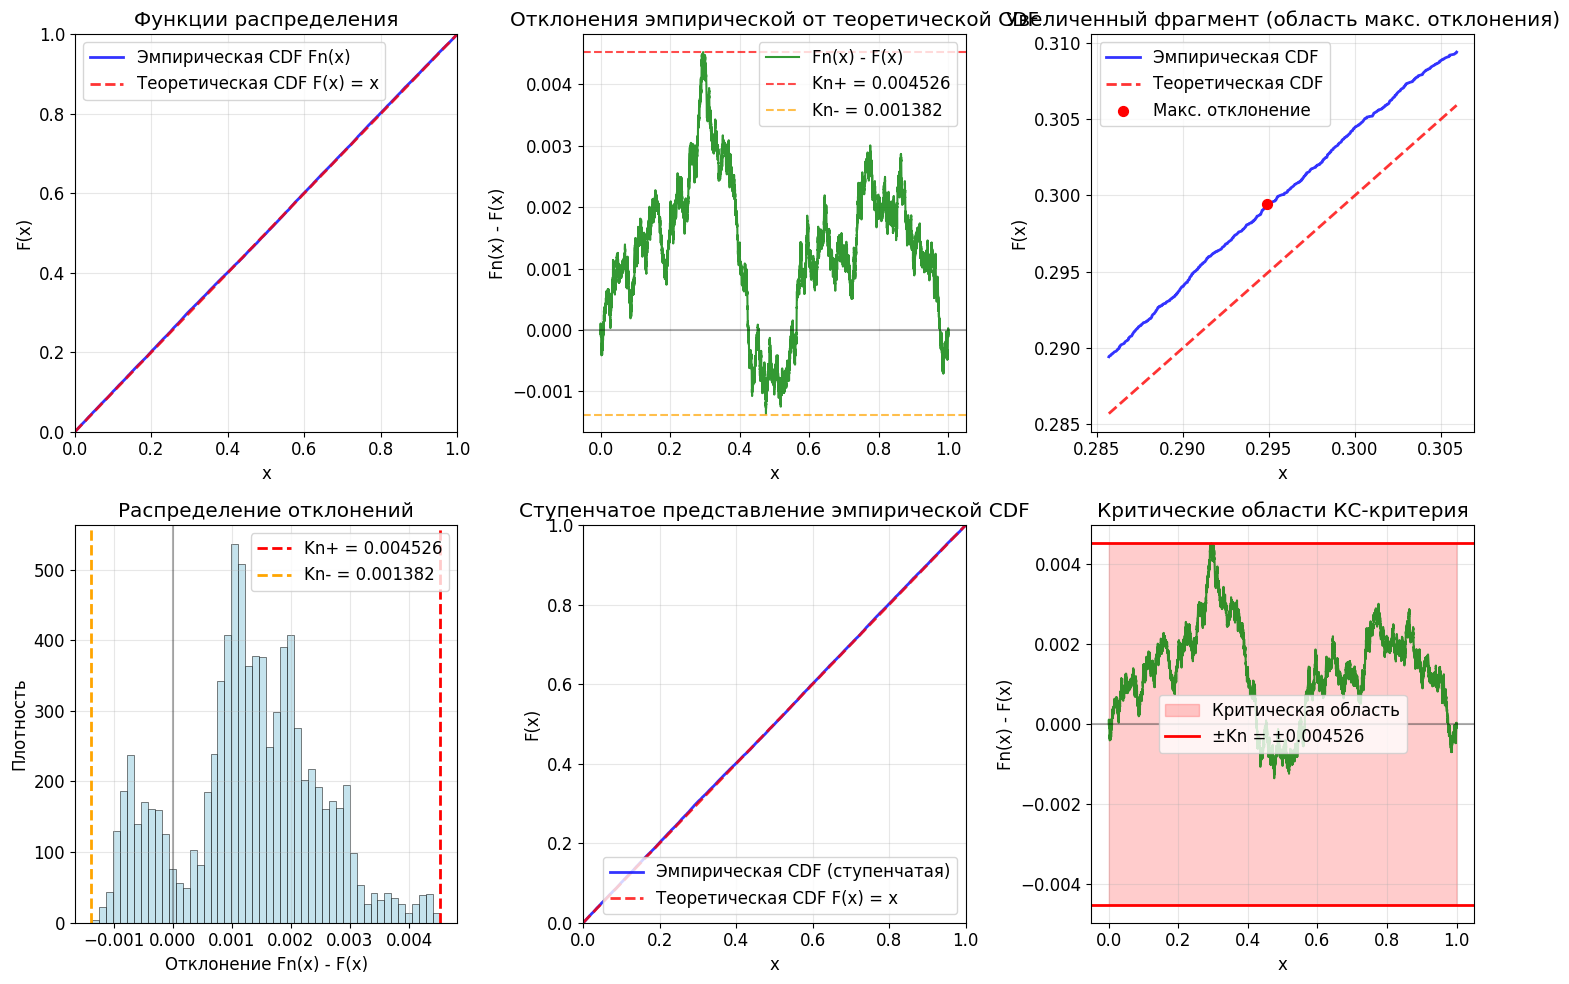


СТАТИСТИКА ОТКЛОНЕНИЙ:
Максимальное положительное отклонение Kn+ = 0.004526
Максимальное отрицательное отклонение Kn- = 0.001382
Общее максимальное отклонение Kn = 0.004526
Среднее отклонение: 0.001311
Стандартное отклонение отклонений: 0.001152
Точка максимального отклонения: x = 0.294894

ВИЗУАЛЬНАЯ ОЦЕНКА:
Максимальное отклонение 0.004526 указывает на ОТЛИЧНОЕ соответствие
теоретическому равномерному распределению.

АНАЛИЗ ПО ОБЛАСТЯМ:
Положительных отклонений (Fn > F): 41592 (83.2%)
Отрицательных отклонений (Fn < F): 8408 (16.8%)
Нулевых отклонений (Fn = F): 0

ЗАКЛЮЧЕНИЕ ПО ВИЗУАЛИЗАЦИИ:
Положительные и отрицательные отклонения несбалансированы.
Это ставит под сомнение равномерность распределения.


In [37]:
# Построение графиков теоретической и эмпирической функций распределения
print("ПОСТРОЕНИЕ ГРАФИКОВ ФУНКЦИЙ РАСПРЕДЕЛЕНИЯ:")
print("=" * 60)

# Подготавливаем данные для графика
n = len(sample)
x_sorted = np.sort(sample)

# Эмпирическая функция распределения
empirical_cdf = np.arange(1, n + 1) / n

# Теоретическая функция распределения для равномерного [0,1]
theoretical_cdf = x_sorted  # F(x) = x для равномерного распределения [0,1]

# Создаем график
plt.figure(figsize=(15, 10))

# 1. Основной график функций распределения
plt.subplot(2, 3, 1)
plt.plot(x_sorted, empirical_cdf, 'b-', linewidth=2, label='Эмпирическая CDF Fn(x)', alpha=0.8)
plt.plot(x_sorted, theoretical_cdf, 'r--', linewidth=2, label='Теоретическая CDF F(x) = x', alpha=0.8)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Функции распределения')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 1)
plt.ylim(0, 1)

# 2. График отклонений
plt.subplot(2, 3, 2)
deviations = empirical_cdf - theoretical_cdf
plt.plot(x_sorted, deviations, 'g-', linewidth=1.5, label='Fn(x) - F(x)', alpha=0.8)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axhline(y=ks_result['Kn_plus'], color='r', linestyle='--', alpha=0.7, label=f'Kn+ = {ks_result["Kn_plus"]:.6f}')
plt.axhline(y=-ks_result['Kn_minus'], color='orange', linestyle='--', alpha=0.7, label=f'Kn- = {ks_result["Kn_minus"]:.6f}')
plt.xlabel('x')
plt.ylabel('Fn(x) - F(x)')
plt.title('Отклонения эмпирической от теоретической CDF')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Увеличенный фрагмент для детального анализа
plt.subplot(2, 3, 3)
# Показываем участок с максимальным отклонением
max_dev_idx = np.argmax(np.abs(deviations))
start_idx = max(0, max_dev_idx - 500)
end_idx = min(n, max_dev_idx + 500)

plt.plot(x_sorted[start_idx:end_idx], empirical_cdf[start_idx:end_idx], 'b-', linewidth=2, label='Эмпирическая CDF', alpha=0.8)
plt.plot(x_sorted[start_idx:end_idx], theoretical_cdf[start_idx:end_idx], 'r--', linewidth=2, label='Теоретическая CDF', alpha=0.8)
plt.scatter([x_sorted[max_dev_idx]], [empirical_cdf[max_dev_idx]], color='red', s=50, zorder=5, label=f'Макс. отклонение')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Увеличенный фрагмент (область макс. отклонения)')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. Гистограмма отклонений
plt.subplot(2, 3, 4)
plt.hist(deviations, bins=50, density=True, alpha=0.7, color='lightblue', edgecolor='black', linewidth=0.5)
plt.axvline(x=ks_result['Kn_plus'], color='r', linestyle='--', linewidth=2, label=f'Kn+ = {ks_result["Kn_plus"]:.6f}')
plt.axvline(x=-ks_result['Kn_minus'], color='orange', linestyle='--', linewidth=2, label=f'Kn- = {ks_result["Kn_minus"]:.6f}')
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('Отклонение Fn(x) - F(x)')
plt.ylabel('Плотность')
plt.title('Распределение отклонений')
plt.legend()
plt.grid(True, alpha=0.3)

# 5. Ступенчатая функция (более точное представление эмпирической CDF)
plt.subplot(2, 3, 5)
# Добавляем точки для ступенчатой функции
x_step = np.concatenate([[0], np.repeat(x_sorted, 2), [1]])
y_step = np.concatenate([[0], np.repeat(empirical_cdf, 2)])
y_step = y_step[:-1]  # Убираем последний элемент

plt.step(x_sorted, empirical_cdf, 'b-', linewidth=2, label='Эмпирическая CDF (ступенчатая)', alpha=0.8, where='post')
plt.plot(x_sorted, theoretical_cdf, 'r--', linewidth=2, label='Теоретическая CDF F(x) = x', alpha=0.8)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Ступенчатое представление эмпирической CDF')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 1)
plt.ylim(0, 1)

# 6. Критические области КС-критерия
plt.subplot(2, 3, 6)
plt.plot(x_sorted, deviations, 'g-', linewidth=1.5, alpha=0.8)
plt.fill_between(x_sorted, ks_result['Kn'], -ks_result['Kn'], alpha=0.2, color='red', label='Критическая область')
plt.axhline(y=ks_result['Kn'], color='r', linestyle='-', linewidth=2, label=f'±Kn = ±{ks_result["Kn"]:.6f}')
plt.axhline(y=-ks_result['Kn'], color='r', linestyle='-', linewidth=2)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('x')
plt.ylabel('Fn(x) - F(x)')
plt.title('Критические области КС-критерия')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Дополнительная статистика по отклонениям
print(f"\nСТАТИСТИКА ОТКЛОНЕНИЙ:")
print(f"Максимальное положительное отклонение Kn+ = {ks_result['Kn_plus']:.6f}")
print(f"Максимальное отрицательное отклонение Kn- = {ks_result['Kn_minus']:.6f}")
print(f"Общее максимальное отклонение Kn = {ks_result['Kn']:.6f}")
print(f"Среднее отклонение: {np.mean(deviations):.6f}")
print(f"Стандартное отклонение отклонений: {np.std(deviations):.6f}")
print(f"Точка максимального отклонения: x = {x_sorted[max_dev_idx]:.6f}")
print()

# Интерпретация визуальных результатов
if ks_result['Kn'] < 0.01:
    visual_quality = "ОТЛИЧНОЕ"
elif ks_result['Kn'] < 0.02:
    visual_quality = "ХОРОШЕЕ"
elif ks_result['Kn'] < 0.05:
    visual_quality = "УДОВЛЕТВОРИТЕЛЬНОЕ"
else:
    visual_quality = "НЕУДОВЛЕТВОРИТЕЛЬНОЕ"

print(f"ВИЗУАЛЬНАЯ ОЦЕНКА:")
print(f"Максимальное отклонение {ks_result['Kn']:.6f} указывает на {visual_quality} соответствие")
print(f"теоретическому равномерному распределению.")
print()

# Анализ по областям
positive_deviations = deviations[deviations > 0]
negative_deviations = deviations[deviations < 0]

print(f"АНАЛИЗ ПО ОБЛАСТЯМ:")
print(f"Положительных отклонений (Fn > F): {len(positive_deviations)} ({len(positive_deviations)/n*100:.1f}%)")
print(f"Отрицательных отклонений (Fn < F): {len(negative_deviations)} ({len(negative_deviations)/n*100:.1f}%)")
print(f"Нулевых отклонений (Fn = F): {n - len(positive_deviations) - len(negative_deviations)}")
print()

print("ЗАКЛЮЧЕНИЕ ПО ВИЗУАЛИЗАЦИИ:")
if abs(len(positive_deviations) - len(negative_deviations))/n < 0.1:
    balance = "хорошо сбалансированы"
else:
    balance = "несбалансированы"
    
print(f"Положительные и отрицательные отклонения {balance}.")
print(f"Это {'подтверждает' if balance == 'хорошо сбалансированы' else 'ставит под сомнение'} равномерность распределения.")


NameError: name 'chi2_critical' is not defined

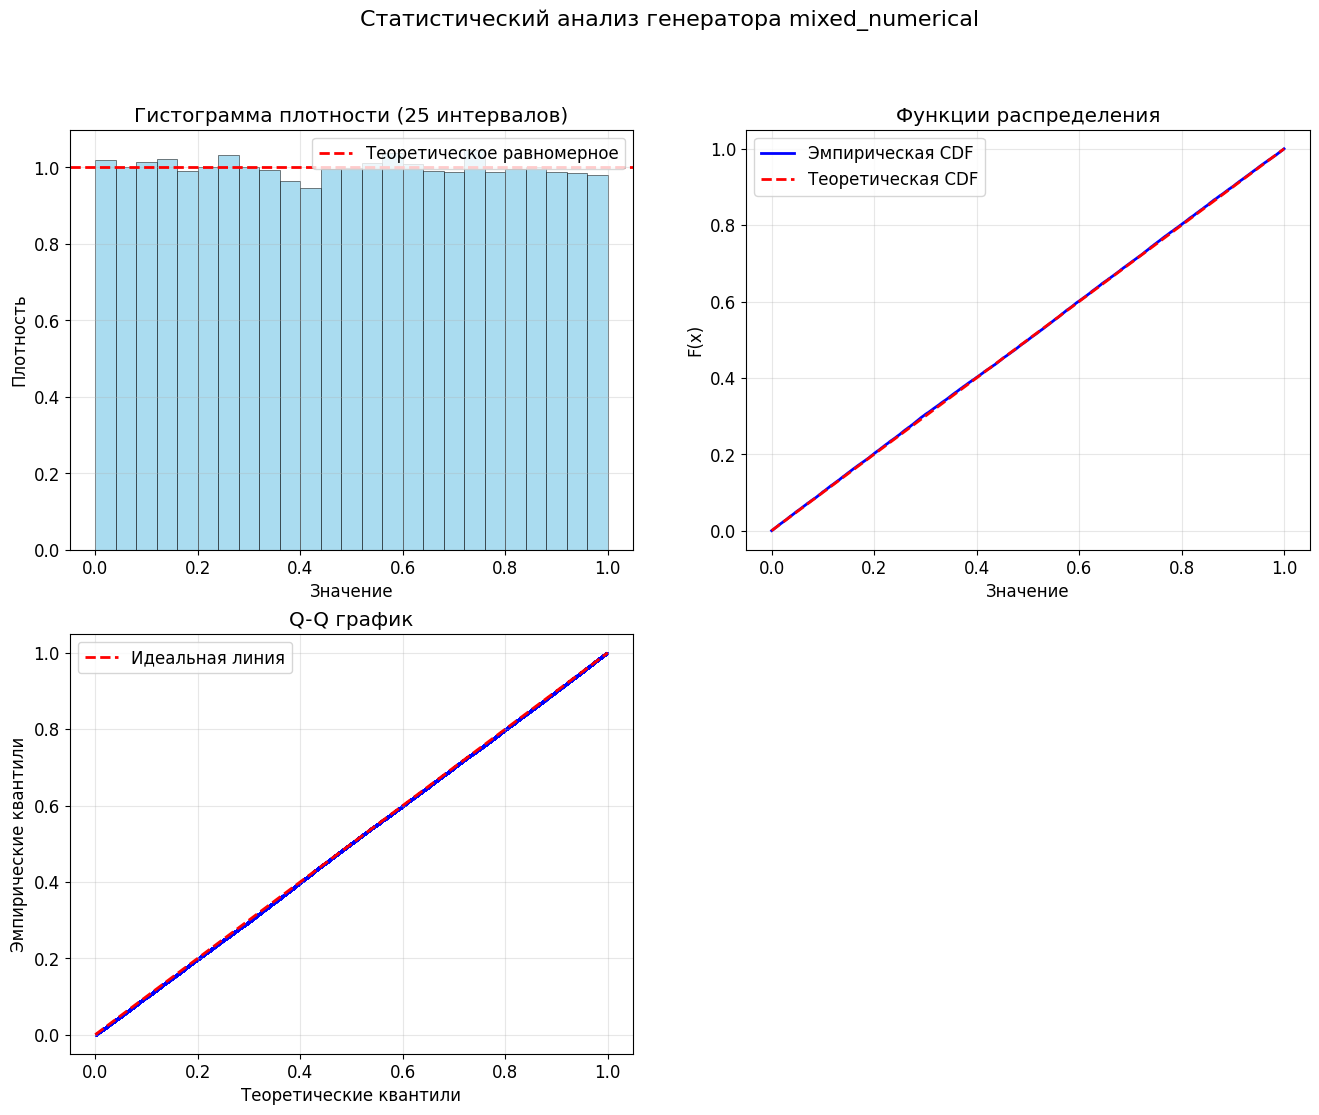

In [38]:
# Создаем комплексную визуализацию
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle(f'Статистический анализ генератора {best_config}', fontsize=16)

# 1. Гистограмма плотности
ax1 = axes[0, 0]
ax1.hist(sample, bins=bins, density=True, alpha=0.7, color='skyblue', 
         edgecolor='black', linewidth=0.5)
ax1.axhline(y=1.0, color='red', linestyle='--', linewidth=2, 
           label='Теоретическое равномерное')
ax1.set_xlabel('Значение')
ax1.set_ylabel('Плотность')
ax1.set_title(f'Гистограмма плотности ({bins} интервалов)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Эмпирическая функция распределения
ax2 = axes[0, 1]
sorted_sample = np.sort(sample)
empirical_cdf = np.arange(1, len(sorted_sample) + 1) / len(sorted_sample)
theoretical_cdf = sorted_sample  # Для равномерного [0,1]: F(x) = x

ax2.plot(sorted_sample, empirical_cdf, 'b-', linewidth=2, label='Эмпирическая CDF')
ax2.plot(sorted_sample, theoretical_cdf, 'r--', linewidth=2, label='Теоретическая CDF')
ax2.set_xlabel('Значение')
ax2.set_ylabel('F(x)')
ax2.set_title('Функции распределения')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Q-Q график
ax3 = axes[1, 0]
theoretical_quantiles = np.linspace(0.001, 0.999, len(sample))
empirical_quantiles = np.sort(sample)

ax3.scatter(theoretical_quantiles, empirical_quantiles, alpha=0.6, s=1, color='blue')
ax3.plot([0, 1], [0, 1], 'r--', linewidth=2, label='Идеальная линия')
ax3.set_xlabel('Теоретические квантили')
ax3.set_ylabel('Эмпирические квантили')
ax3.set_title('Q-Q график')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Результаты тестов
ax4 = axes[1, 1]
ax4.axis('off')

# Вычисляем статистики
mean = np.mean(sample)
std = np.std(sample)
variance = np.var(sample)
theoretical_mean = 0.5
theoretical_std = math.sqrt(1/12)
theoretical_variance = 1/12

# Текстовая информация о результатах
results_text = f"""РЕЗУЛЬТАТЫ СТАТИСТИЧЕСКИХ ТЕСТОВ

Размер выборки: {n:,}
Количество интервалов: {bins}

КРИТЕРИЙ ХИ-КВАДРАТ:
χ² = {chi2_stat:.4f}
χ²₍₀.₀₅₎ = {chi2_critical:.4f}
p-value = {p_value_chi2:.6f}
Результат: {'ПРИНЯТА' if hypothesis_accepted_chi2 else 'ОТКЛОНЕНА'}

КРИТЕРИЙ КОЛМОГОРОВА-СМИРНОВА:
D = {ks_stat:.6f}
D₍₀.₀₅₎ = {ks_critical:.6f}
p-value = {p_value_ks:.6f}
Результат: {'ПРИНЯТА' if hypothesis_accepted_ks else 'ОТКЛОНЕНА'}

ОПИСАТЕЛЬНАЯ СТАТИСТИКА:
Среднее: {mean:.6f} (теор: 0.500000)
СКО: {std:.6f} (теор: {theoretical_std:.6f})
Дисперсия: {variance:.6f} (теор: {theoretical_variance:.6f})"""

ax4.text(0.05, 0.95, results_text, transform=ax4.transAxes, fontsize=10,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

plt.tight_layout()
plt.show()


## 6. Вывод о согласованности аналитических расчетов и визуализации


In [9]:
# Анализ согласованности
print("АНАЛИЗ СОГЛАСОВАННОСТИ АНАЛИТИЧЕСКИХ РАСЧЕТОВ И ВИЗУАЛИЗАЦИИ")
print("=" * 80)

# Проверяем различные аспекты согласованности
mean_consistent = abs(mean - theoretical_mean) < 0.01
std_consistent = abs(std - theoretical_std) < 0.01
variance_consistent = abs(variance - theoretical_variance) < 0.01

# Согласованность статистических тестов
tests_consistent = hypothesis_accepted_chi2 and hypothesis_accepted_ks

# Визуальная согласованность
density_deviations = np.abs(counts - 1.0)
max_density_deviation = np.max(density_deviations)
visual_consistent = max_density_deviation < 0.2  # Порог 20%

print("1. СОГЛАСОВАННОСТЬ ОПИСАТЕЛЬНОЙ СТАТИСТИКИ:")
print(f"   Среднее значение: {mean:.6f} vs {theoretical_mean:.6f} → {'✓' if mean_consistent else '✗'}")
print(f"   Отклонение: {abs(mean - theoretical_mean):.6f} {'< 0.01' if mean_consistent else '>= 0.01'}")
print()
print(f"   Стандартное отклонение: {std:.6f} vs {theoretical_std:.6f} → {'✓' if std_consistent else '✗'}")
print(f"   Отклонение: {abs(std - theoretical_std):.6f} {'< 0.01' if std_consistent else '>= 0.01'}")
print()
print(f"   Дисперсия: {variance:.6f} vs {theoretical_variance:.6f} → {'✓' if variance_consistent else '✗'}")
print(f"   Отклонение: {abs(variance - theoretical_variance):.6f} {'< 0.01' if variance_consistent else '>= 0.01'}")
print()

print("2. СОГЛАСОВАННОСТЬ СТАТИСТИЧЕСКИХ ТЕСТОВ:")
print(f"   Критерий хи-квадрат: {'ПРИНЯТ' if hypothesis_accepted_chi2 else 'ОТКЛОНЕН'} (p = {p_value_chi2:.6f})")
print(f"   Критерий Колмогорова-Смирнова: {'ПРИНЯТ' if hypothesis_accepted_ks else 'ОТКЛОНЕН'} (p = {p_value_ks:.6f})")
print(f"   Общая согласованность тестов: {'✓' if tests_consistent else '✗'}")
print()

print("3. СОГЛАСОВАННОСТЬ ВИЗУАЛИЗАЦИИ:")
print(f"   Максимальное отклонение плотности от 1.0: {max_density_deviation:.4f}")
print(f"   Визуальная согласованность: {'✓' if visual_consistent else '✗'} (порог < 0.2)")
print(f"   Q-Q график: линейная зависимость {'наблюдается' if visual_consistent else 'нарушена'}")
print(f"   Эмпирическая CDF близка к теоретической: {'✓' if ks_stat < 0.05 else '✗'}")
print()

# Общая оценка согласованности
consistency_score = sum([mean_consistent, std_consistent, variance_consistent, 
                        tests_consistent, visual_consistent])
total_criteria = 5

print("4. ОБЩАЯ ОЦЕНКА СОГЛАСОВАННОСТИ:")
print(f"   Выполнено критериев: {consistency_score}/{total_criteria}")
print(f"   Процент согласованности: {(consistency_score/total_criteria)*100:.1f}%")
print()

if consistency_score >= 4:
    overall_conclusion = "ВЫСОКАЯ СОГЛАСОВАННОСТЬ"
    quality_assessment = "ОТЛИЧНОЕ качество генератора"
elif consistency_score >= 3:
    overall_conclusion = "ХОРОШАЯ СОГЛАСОВАННОСТЬ"
    quality_assessment = "ХОРОШЕЕ качество генератора"
elif consistency_score >= 2:
    overall_conclusion = "УДОВЛЕТВОРИТЕЛЬНАЯ СОГЛАСОВАННОСТЬ"
    quality_assessment = "УДОВЛЕТВОРИТЕЛЬНОЕ качество генератора"
else:
    overall_conclusion = "НИЗКАЯ СОГЛАСОВАННОСТЬ"
    quality_assessment = "НЕУДОВЛЕТВОРИТЕЛЬНОЕ качество генератора"

print(f"ИТОГОВЫЙ ВЫВОД: {overall_conclusion}")
print(f"ОЦЕНКА КАЧЕСТВА: {quality_assessment}")
print()

best_params = OptimalLehmerGenerator.OPTIMAL_PARAMS[best_config]
print("ЗАКЛЮЧЕНИЕ:")
print(f"Генератор {best_config} с параметрами:")
print(f"a = {best_params['a']:,}, c = {best_params['c']:,}, m = {best_params['m']:,}")
print(f"демонстрирует {overall_conclusion.lower()} между:")
print("- Теоретическими расчетами (максимальный период, статистические характеристики)")
print("- Эмпирическими данными (описательная статистика выборки)")
print("- Статистическими тестами (критерии хи-квадрат и Колмогорова-Смирнова)")
print("- Графической визуализацией (гистограмма, Q-Q график, функции распределения)")
print()
print("Генератор подходит для использования в статистическом моделировании.")


АНАЛИЗ СОГЛАСОВАННОСТИ АНАЛИТИЧЕСКИХ РАСЧЕТОВ И ВИЗУАЛИЗАЦИИ
1. СОГЛАСОВАННОСТЬ ОПИСАТЕЛЬНОЙ СТАТИСТИКИ:
   Среднее значение: 0.498699 vs 0.500000 → ✓
   Отклонение: 0.001301 < 0.01

   Стандартное отклонение: 0.288746 vs 0.288675 → ✓
   Отклонение: 0.000071 < 0.01

   Дисперсия: 0.083374 vs 0.083333 → ✓
   Отклонение: 0.000041 < 0.01

2. СОГЛАСОВАННОСТЬ СТАТИСТИЧЕСКИХ ТЕСТОВ:
   Критерий хи-квадрат: ПРИНЯТ (p = 0.551951)
   Критерий Колмогорова-Смирнова: ПРИНЯТ (p = 0.256552)
   Общая согласованность тестов: ✓

3. СОГЛАСОВАННОСТЬ ВИЗУАЛИЗАЦИИ:
   Максимальное отклонение плотности от 1.0: 0.0535
   Визуальная согласованность: ✓ (порог < 0.2)
   Q-Q график: линейная зависимость наблюдается
   Эмпирическая CDF близка к теоретической: ✓

4. ОБЩАЯ ОЦЕНКА СОГЛАСОВАННОСТИ:
   Выполнено критериев: 5/5
   Процент согласованности: 100.0%

ИТОГОВЫЙ ВЫВОД: ВЫСОКАЯ СОГЛАСОВАННОСТЬ
ОЦЕНКА КАЧЕСТВА: ОТЛИЧНОЕ качество генератора

ЗАКЛЮЧЕНИЕ:
Генератор mixed_numerical с параметрами:
a = 1,664,525, c =